<a href="https://colab.research.google.com/github/ridwanabdiansah29/Submission-Dicoding-NLP-TENSORFLOW/blob/main/RIDWAN_ABDIANSAH_M193X0386_M06_NLPTENSORFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ridwan Abdiansah
M193X0386
M06

##load library

In [ ]:
import pandas as pd
df = pd.read_csv('financial_news_mt.csv')
df.head()

,Unnamed: 0,label,en_text,id_text
0,2,negative,The international electronic industry company ...,Perusahaan industri elektronik internasional E...
1,3,positive,With the new production plant the company woul...,"Dengan pabrik produksi baru, perusahaan akan m..."
2,4,positive,According to the company 's updated strategy f...,Sesuai dengan strategi terbaru perusahaan untu...
3,5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,PEMBIAYAAN UNTUK PERTUMBUHAN ASPOCOMP Aspocomp...
4,6,positive,"For the last quarter of 2010 , Componenta 's n...","Untuk kuartal terakhir tahun 2010, penjualan b..."


In [ ]:
print(df.keys())

Index(['Unnamed: 0', 'label', 'en_text', 'id_text'], dtype='object')


In [ ]:
df = df.drop(['Unnamed: 0','id_text'], axis=1)
df

,label,en_text
0,negative,The international electronic industry company ...
1,positive,With the new production plant the company woul...
2,positive,According to the company 's updated strategy f...
3,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
4,positive,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
1962,negative,HELSINKI Thomson Financial - Shares in Cargote...
1963,negative,LONDON MarketWatch -- Share prices ended lower...
1964,negative,Operating profit fell to EUR 35.4 mn from EUR ...
1965,negative,Net sales of the Paper segment decreased to EU...


##Data Cleaning

In [ ]:
#lower case
df['en_text'] = df['en_text'].apply(lambda x: x.lower())
df

,label,en_text
0,negative,the international electronic industry company ...
1,positive,with the new production plant the company woul...
2,positive,according to the company 's updated strategy f...
3,positive,financing of aspocomp 's growth aspocomp is ag...
4,positive,"for the last quarter of 2010 , componenta 's n..."
...,...,...
1962,negative,helsinki thomson financial - shares in cargote...
1963,negative,london marketwatch -- share prices ended lower...
1964,negative,operating profit fell to eur 35.4 mn from eur ...
1965,negative,net sales of the paper segment decreased to eu...


In [ ]:
#menghilangkan tanda baca
import string
def remove_punct(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

df['en_text'] = df['en_text'].apply(lambda x: remove_punct(x))
df

,label,en_text
0,negative,the international electronic industry company ...
1,positive,with the new production plant the company woul...
2,positive,according to the company s updated strategy fo...
3,positive,financing of aspocomp s growth aspocomp is agg...
4,positive,for the last quarter of 2010 componenta s net...
...,...,...
1962,negative,helsinki thomson financial shares in cargotec...
1963,negative,london marketwatch share prices ended lower i...
1964,negative,operating profit fell to eur 354 mn from eur 6...
1965,negative,net sales of the paper segment decreased to eu...


In [ ]:
##melihat stopwords
from collections import defaultdict
import matplotlib.pyplot as plt

def create_corpus(score_label):
  corpus = []

  for list_words in df[df['label']==score_label]['en_text'].str.split():
    for word in list_words:
      corpus.append(word.lower())

  return corpus
def common_stopwords(score_label):
  corpus = create_corpus(score_label)
  
  dict_result = defaultdict(int)
  for word in corpus:
    if word in stopwords_en:
      dict_result[word] += 1
  
  top_result = sorted(dict_result.items(), key=lambda x: x[1], reverse=True)[:10] # Top Ten
  if top_result == []:
    return

  x, y = zip(*top_result)
  plt.bar(x, y)
  plt.title(score_label)
  plt.show()

In [ ]:
# Inisialisasi Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


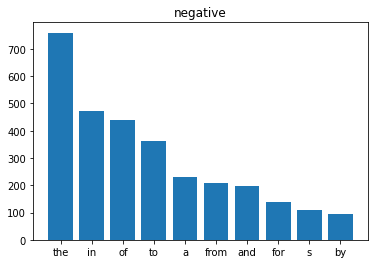

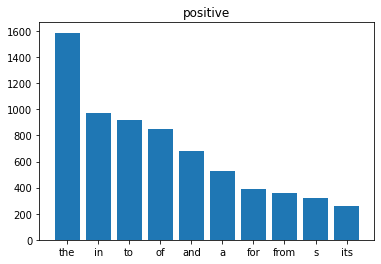

In [ ]:
for i in df['label'].unique():
  common_stopwords(i)

In [ ]:
def remove_stopwords(text):
  final_text = []
  for word in text.split():
    if word.strip() not in stopwords_en:
      final_text.append(word.strip())
  return " ".join(final_text)

In [ ]:
df['en_text'] = df['en_text'].apply(lambda x: remove_stopwords(x))
df

,label,en_text
0,negative,international electronic industry company elco...
1,positive,new production plant company would increase ca...
2,positive,according company updated strategy years 20092...
3,positive,financing aspocomp growth aspocomp aggressivel...
4,positive,last quarter 2010 componenta net sales doubled...
...,...,...
1962,negative,helsinki thomson financial shares cargotec fel...
1963,negative,london marketwatch share prices ended lower lo...
1964,negative,operating profit fell eur 354 mn eur 688 mn 20...
1965,negative,net sales paper segment decreased eur 2216 mn ...


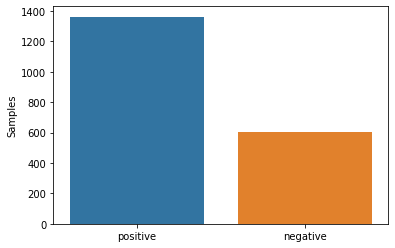

positive    1363
negative     604
Name: label, dtype: int64


In [ ]:
import seaborn as sns
x = df['label'].value_counts()
sns.barplot(x=x.index, y=x)
plt.gca().set_ylabel('Samples')
plt.show()
print(x)

In [ ]:
# class count
min_class_count = df['label'].value_counts().iloc[-1]
print(min_class_count)

# separate class
class_1 = df[df['label'] == 'positive']
class_2 = df[df['label'] == 'negative']

604


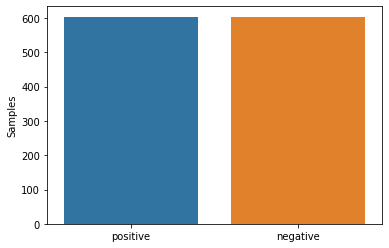

positive    604
negative    604
Name: label, dtype: int64


In [ ]:
# Random under sampling
class_1_under = class_1.sample(min_class_count)
class_2_under = class_2.sample(min_class_count)


df_imbang = pd.concat([
    class_1_under,
    class_2_under
], axis=0)

x = df_imbang['label'].value_counts()
sns.barplot(x=x.index, y=x)
plt.gca().set_ylabel('Samples')
plt.show()
print(x)

In [ ]:
category = pd.get_dummies(df_imbang.label)
df_new = pd.concat([df_imbang, category], axis=1)
df_new = df_new.drop(columns='label')
df_new

,en_text,negative,positive
535,profit taxes period eur0 9 eur0 01 last year,0,1
1381,addition russia seek additional growth ukraine,0,1
323,operating profit asian plants grew markedly,0,1
1120,insurer anticipates share nordea net profit si...,0,1
776,fi developing cooperation keyword advertising ...,0,1
...,...,...,...
1786,finnish bank land reports operating profit fel...,1,0
1719,finland oppohjola staff union boycotting group...,1,0
1637,recent troubles simply make neteller cheaper,1,0
1511,go bed worrying every night said,1,0


In [ ]:
finance = df_new['en_text'].values
label = df_new[['negative','positive']].values

In [ ]:
from sklearn.model_selection import train_test_split
finance_train, finance_val, label_train, label_val = train_test_split(finance, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(finance_train)

sequences_train = tokenizer.texts_to_sequences(finance_train)
sequences_val = tokenizer.texts_to_sequences(finance_val)

padded_train = pad_sequences(sequences_train)
padded_val = pad_sequences(sequences_val)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32,),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_20 (Dense)            (None, 128)               4224      
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)               

In [ ]:
class callback_acc(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      self.model.stop_training = True

callback_acc = callback_acc()

In [ ]:
num_epochs = 50
history = model.fit(padded_train, 
                    label_train, 
                    epochs=num_epochs,
                    batch_size=32,
                    callbacks=[callback_acc],
                    validation_data=(padded_val, label_val), verbose=1)

Epoch 1/50
31/31 [==============================] - 4s 40ms/step - loss: 0.6936 - accuracy: 0.4948 - val_loss: 0.6934 - val_accuracy: 0.4876
Epoch 2/50
31/31 [==============================] - 1s 22ms/step - loss: 0.6925 - accuracy: 0.5104 - val_loss: 0.6929 - val_accuracy: 0.4876
Epoch 3/50
31/31 [==============================] - 1s 22ms/step - loss: 0.6903 - accuracy: 0.5290 - val_loss: 0.6861 - val_accuracy: 0.4917
Epoch 4/50
31/31 [==============================] - 1s 22ms/step - loss: 0.6451 - accuracy: 0.6573 - val_loss: 0.6070 - val_accuracy: 0.7231
Epoch 5/50
31/31 [==============================] - 1s 22ms/step - loss: 0.3661 - accuracy: 0.9027 - val_loss: 0.5719 - val_accuracy: 0.8182
Epoch 6/50
31/31 [==============================] - 1s 22ms/step - loss: 0.1488 - accuracy: 0.9617 - val_loss: 0.6420 - val_accuracy: 0.7769
Epoch 7/50
31/31 [==============================] - 1s 22ms/step - loss: 0.0467 - accuracy: 0.9876 - val_loss: 0.8045 - val_accuracy: 0.8182
Epoch 8/50
31